In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [ ]:
# con el num_words al ser nombres se importaran las n palabras mas comunes que se deseen traer

(train_data,train_labes),(test_data,test_labels) = imdb.load_data(num_words=12000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
# los indices del vector de palabras def en ingles
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index
# para voltear el diccionario se hace la siguiente linea
word_index = dict([(value,key) for (key,value) in word_index.items() ])

In [ ]:
word_index

In [ ]:
# en el word index las primeras 3 palabras son palabras reservadas
for n in train_data[0]:
  print(f"{word_index.get(n-3)}")

**Vectorizacion de palabras**

In [ ]:
#vectorizacion de datos se ref a llevar todo a binario
def vectorizer(sequences,dim=12000):
  # generar un tensor que sea de la cantidad de palabras que se tiene por la dimension def
  results = np.zeros((len(sequences),dim))
  # con este ciclo se def un valor 1 cada vez que la palabra coincida con la sequencia
  for n, sequences in enumerate(sequences):
    results[n,sequences]=1
  return results

**Creacion de set de datos**

In [ ]:
# train data
x_train = vectorizer(train_data)
y_train = np.asarray(train_labes).astype("float32")

# test data
x_test = vectorizer(test_data)
y_test = np.asarray(test_labels).astype("float32")

# val data
# creada por separacion del test data en part test y val data
x_val = x_train[:12000]
partial_x_train = x_train[12000:]

y_val = y_train[:12000]
partial_y_train = y_train[12000:]

**Entrenamiento**

In [ ]:
# para clasificacion binaria es preferible utilizar
model = models.Sequential()

# el input_shape nada mas se define en la capa de entrada de la red ya el resto recibira la dim de la anterior
model.add(layers.Dense( 15, activation="relu", input_shape = (12000,) )) 
model.add(layers.Dense( 20, activation="relu")) 
model.add(layers.Dense( 1, activation="sigmoid")) 

model.compile(
              optimizer="rmsprop", # mejora del descenso del gradiente
              loss="binary_crossentropy",
              metrics= ["acc"],)

In [ ]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,# numero de cada registro o batch
                    validation_data=(x_val,y_val), # hace la validacion de lo que esta sacando en el ajuste del modelo con esta data 
                    )

Epoch 1/20
26/26 [==============================] - 16s 51ms/step - loss: 0.6102 - acc: 0.6905 - val_loss: 0.4117 - val_acc: 0.8669
Epoch 2/20
26/26 [==============================] - 1s 26ms/step - loss: 0.3372 - acc: 0.9026 - val_loss: 0.3336 - val_acc: 0.8709
Epoch 3/20
26/26 [==============================] - 1s 26ms/step - loss: 0.2327 - acc: 0.9328 - val_loss: 0.2854 - val_acc: 0.8889
Epoch 4/20
26/26 [==============================] - 1s 26ms/step - loss: 0.1690 - acc: 0.9537 - val_loss: 0.2938 - val_acc: 0.8816
Epoch 5/20
26/26 [==============================] - 1s 26ms/step - loss: 0.1357 - acc: 0.9622 - val_loss: 0.2870 - val_acc: 0.8849
Epoch 6/20
26/26 [==============================] - 1s 26ms/step - loss: 0.0979 - acc: 0.9751 - val_loss: 0.3044 - val_acc: 0.8820
Epoch 7/20
26/26 [==============================] - 1s 26ms/step - loss: 0.0792 - acc: 0.9829 - val_loss: 0.3154 - val_acc: 0.8827
Epoch 8/20
26/26 [==============================] - 1s 26ms/step - loss: 0.0645 - 

**Visualizacion de data**

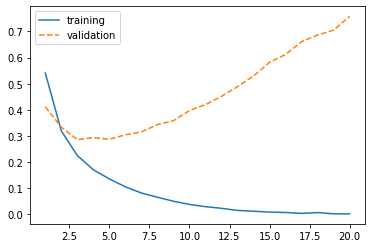

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, label="training")

plt.plot(epoch,val_loss_values, "--", label="validation")
plt.legend()
plt.show()

En la funcion de perdida de entrenamiento el modelo se ajusta muy rapidamente a los datos lo cual genera overfitting mientras que en el set de validacion este se estanca en ciertos valores lo cual no permite una muy buena prediccion del modelo

**Para reducir el overfitting**

***Comenzar con modelos sencillos e ir aumentando la complejidad***

**Regularizacion**
Hacer datos mas regulares es decir reducir la complejidad del modelo lo mayor posible

L1 suma el valor absoluto del peso multiplicado por un parametro lambda a la funcin de coste

L2 suma el cuadrado del peso multiplicado por un parametro lambda a la funcion de coste

el parametro lambda debe ser bien elegido para no generar divergencia del algoritmo

**Dropout**

Consiste en apagar un porcentaje de neuronas en la red de forma aleatoria para evitar overfitting asi los layers no dependeran entre si y neuronas no dependeran unas de otras

In [ ]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7962 - accuracy: 0.8508


[0.7962334156036377, 0.8508399724960327]

modelo menos complejo

In [ ]:
# para clasificacion binaria es preferible utilizar
model2 = models.Sequential()

# el input_shape nada mas se define en la capa de entrada de la red ya el resto recibira la dim de la anterior
model2.add(layers.Dense( 4, activation="relu", input_shape = (12000,) )) 
model2.add(layers.Dense( 4, activation="relu")) 
model2.add(layers.Dense( 1, activation="sigmoid")) 

model2.compile(
              optimizer='rmsprop', # mejora del descenso del gradiente
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history_2 = model.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,# numero de cada registro o batch
                    validation_data=(x_val,y_val), # hace la validacion de lo que esta sacando en el ajuste del modelo con esta data 
                    )

Epoch 1/20
26/26 [==============================] - 1s 35ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.7366 - val_acc: 0.8623
Epoch 2/20
26/26 [==============================] - 1s 26ms/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.7838 - val_acc: 0.8622
Epoch 3/20
26/26 [==============================] - 1s 25ms/step - loss: 9.6511e-04 - acc: 0.9999 - val_loss: 0.8172 - val_acc: 0.8618
Epoch 4/20
26/26 [==============================] - 1s 25ms/step - loss: 0.0013 - acc: 0.9998 - val_loss: 0.8732 - val_acc: 0.8619
Epoch 5/20
26/26 [==============================] - 1s 25ms/step - loss: 5.1911e-04 - acc: 0.9999 - val_loss: 0.8941 - val_acc: 0.8616
Epoch 6/20
26/26 [==============================] - 1s 25ms/step - loss: 4.0060e-04 - acc: 0.9999 - val_loss: 0.9442 - val_acc: 0.8586
Epoch 7/20
26/26 [==============================] - 1s 25ms/step - loss: 2.9044e-04 - acc: 0.9999 - val_loss: 1.0670 - val_acc: 0.8548
Epoch 8/20
26/26 [==============================] - 1s 25ms/step - 

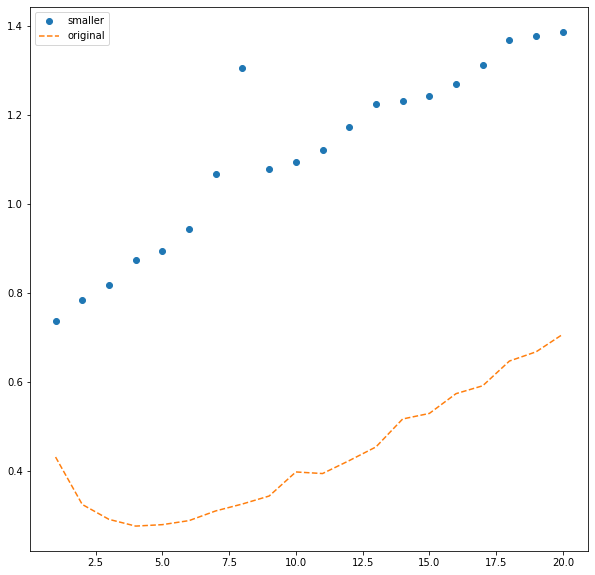

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history_2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

El modelo mas pequeño tarda mas en caer en overfitting que el modelo mas complejo lo que se puede interpretar que el modelo con mayor complejidad no es el mejor para resolver el problema

**Regularizacion**

In [ ]:
from keras import  regularizers
# para clasificacion binaria es preferible utilizar
model3 = models.Sequential()

# el input_shape nada mas se define en la capa de entrada de la red ya el resto recibira la dim de la anterior
model3.add(layers.Dense( 16, activation="relu", input_shape = (12000,), kernel_regularizer=regularizers.l2(0.0001) )) 
model3.add(layers.Dense( 16, activation="relu", kernel_regularizer=regularizers.l2(0.0001)) ) 
model3.add(layers.Dense( 1, activation="sigmoid")) 

model3.compile(
              optimizer="rmsprop", # mejora del descenso del gradiente
              loss="binary_crossentropy",
              metrics= "accuracy",)

In [ ]:
history_3 = model.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,# numero de cada registro o batch
                    validation_data=(x_val,y_val), # hace la validacion de lo que esta sacando en el ajuste del modelo con esta data 
                    )

Epoch 1/20
26/26 [==============================] - 1s 36ms/step - loss: 0.0034 - acc: 0.9995 - val_loss: 0.7891 - val_acc: 0.8637
Epoch 2/20
26/26 [==============================] - 1s 26ms/step - loss: 6.4372e-04 - acc: 1.0000 - val_loss: 0.8152 - val_acc: 0.8629
Epoch 3/20
26/26 [==============================] - 1s 26ms/step - loss: 5.0762e-04 - acc: 1.0000 - val_loss: 0.8611 - val_acc: 0.8626
Epoch 4/20
26/26 [==============================] - 1s 27ms/step - loss: 0.0036 - acc: 0.9988 - val_loss: 0.9116 - val_acc: 0.8600
Epoch 5/20
26/26 [==============================] - 1s 26ms/step - loss: 2.4342e-04 - acc: 1.0000 - val_loss: 0.9279 - val_acc: 0.8607
Epoch 6/20
26/26 [==============================] - 1s 26ms/step - loss: 2.0114e-04 - acc: 1.0000 - val_loss: 0.9477 - val_acc: 0.8605
Epoch 7/20
26/26 [==============================] - 1s 27ms/step - loss: 1.6192e-04 - acc: 1.0000 - val_loss: 0.9859 - val_acc: 0.8591
Epoch 8/20
26/26 [==============================] - 1s 25ms/ste

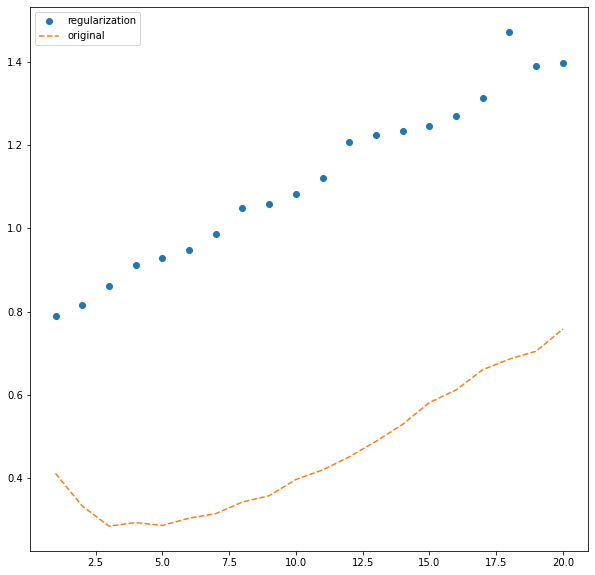

In [ ]:
history_dict = history.history

val_loss_values = history_dict['val_loss']
val_loss_values3 = history_3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

**Dropout**

En TF se añade una capa para activar el dropuota los layers y aumentar la precision del algoritmo

In [ ]:
# para clasificacion binaria es preferible utilizar
model4 = models.Sequential()

# el input_shape nada mas se define en la capa de entrada de la red ya el resto recibira la dim de la anterior
model4.add(layers.Dense( 15, activation="relu", input_shape = (12000,) ))
model4.add(layers.Dropout(.55))
model4.add(layers.Dense( 20, activation="relu"))
model4.add(layers.Dropout(.55))
model4.add(layers.Dense( 1, activation="sigmoid"))

model4.compile(
              optimizer="rmsprop", # mejora del descenso del gradiente
              loss="binary_crossentropy",
              metrics= ["acc"])

history4 = model.fit(partial_x_train,partial_y_train,
                    epochs=20,
                    batch_size=512,# numero de cada registro o batch
                    validation_data=(x_val,y_val), # hace la validacion de lo que esta sacando en el ajuste del modelo con esta data 
                    )

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0050 - acc: 0.9992 - val_loss: 0.7124 - val_acc: 0.8675
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0021 - acc: 0.9998 - val_loss: 0.7519 - val_acc: 0.8664
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0031 - acc: 0.9995 - val_loss: 0.7920 - val_acc: 0.8663
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.8203 - val_acc: 0.8650
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.8677 - val_acc: 0.8647
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.9216 - val_acc: 0.8653
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 6.8145e-04 - acc: 0.9999 - val_loss: 0.9412 - val_acc: 0.8640
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 5.7040

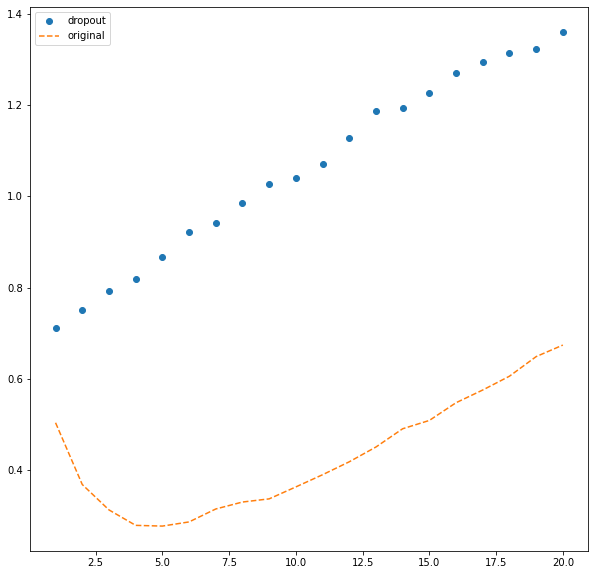

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values4 = history4.history['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()